# Linear regression (September 28th, 2024)

In [ ]:
!gdown -cq 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

## Question 1: Read and Preprocess dataset

In [ ]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
    # your code here ****************************
    result = [line[index] for line in data]
    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()
    N = len(data)

    # get tv(index=0)
    tv_data = get_column(data, 0)

    # get radio(index=1)
    radio_data = get_column(data, 1)

    # get newspaper(index=2)
    newspaper_data = get_column(data, 2)

    # get sales(index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [ ]:
X, y = prepare_data('advertising.csv')
list_ = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list_)

[624.1, 175.10000000000002, 300.5, 78.9]


## Quetion 2: Linear regression with one data point

In [ ]:
# def initialize_params():
#     w1 = random.gauss(mu=0.0, sigma=0.01)
#     w2 = random.gauss(mu=0.0, sigma=0.01)
#     w3 = random.gauss(mu=0.0, sigma=0.01)
#     b = 0
#     return w1, w2, w3, b


def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,
                     -0.002307860847821344, 0)
    return w1, w2, w3, b


def predict(x1, x2, x3, w1, w2, w3, b):
    # your code here ****************************
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

In [ ]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [ ]:
def compute_loss(y_hat, y):
    # your code here ****************************
    loss = (y_hat - y)**2
    return loss

In [ ]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [ ]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    # your code here ****************************
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    # your code here ****************************
    dl_db = 2*(y_hat - y)
    return dl_db

In [ ]:
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [ ]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [ ]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    # your code here ****************************
    wi = wi - lr*dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    # your code here ****************************
    b = b - lr*dl_db
    return b

In [ ]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [ ]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
print(after_wi)

0.50001
1.000005


In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            # print(y_hat, x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

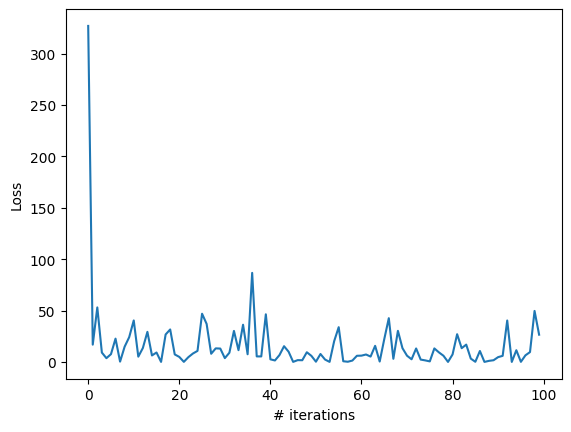

In [ ]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [ ]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is8.176413319549823


In [ ]:
def compute_loss_mae(y_hat, y):
    # your code here ****************************
    loss = abs(y_hat - y)
    return loss

In [ ]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


## Question 3: Mini-batch training

In [ ]:
def compute_loss_mse(y_hat, y):
    # your code here ****************************
    loss = (y_hat - y)**2
    return loss

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    # w1, w2, w3, b = 0, 0, 0, 0

    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            # your code here **************
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b

            # your code here **************
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters

        # your code here **************
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

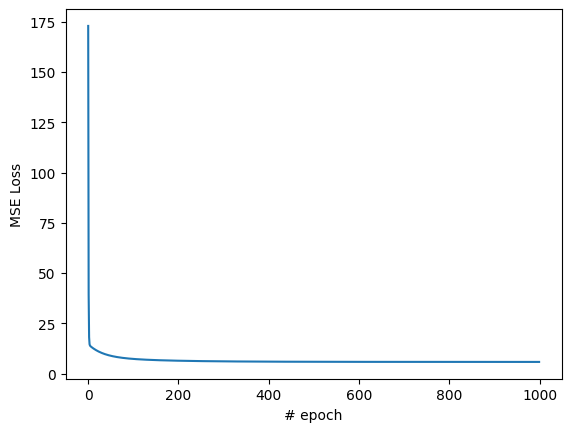

In [ ]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
X, y = prepare_data('advertising.csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [ ]:
def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    def compute_loss(y_hat, y):
        # your code here ****************************
        loss = abs(y_hat - y)
        return loss

    def compute_gradient_wi(xi, y, y_hat):
        # your code here ****************************
        dl_dwi = 0 if y_hat == y else xi*(y_hat - y)/abs(y_hat - y)
        return dl_dwi

    def compute_gradient_b(y, y_hat):
        # your code here ****************************
        dl_db = 0 if y_hat == y else (y_hat - y)/abs(y_hat - y)
        return dl_db

    losses = []

    w1, w2, w3, b = initialize_params()
    # w1, w2, w3, b = 0, 0, 0, 0

    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            # accumulate loss
            # your code here **************
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b

            # your code here **************
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters

        # your code here **************
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

[12.537758993110772, 12.306786418928269, 12.075813844745774, 11.844841270563279, 11.613868696380775, 11.382896122198277, 11.151923548015775, 10.92095097383327, 10.689978399650776, 10.459005825468275, 10.228033251285774, 9.99706067710327, 9.76608810292077, 9.535115528738277, 9.304142954555772, 9.073170380373279, 8.842197806190775, 8.611225232008282, 8.380252657825782, 8.149280083643282, 7.9183075094607815, 7.687334935278275, 7.456362361095777, 7.2253897869132775, 6.99441721273078, 6.763444638548282, 6.532472064365782, 6.303696928779395, 6.081189938366895, 5.8586829479543985, 5.639518193954374, 5.433280404481873, 5.227042615009367, 5.02627351250224, 4.8386930358577445, 4.660172871694349, 4.487604353415483, 4.332324542879863, 4.195409847013496, 4.064693875461415, 3.956540575164051, 3.864482068331549, 3.778410233557584, 3.706484966712123, 3.6375251151200856, 3.575952255926808, 3.5242288100202717, 3.483688061341444, 3.4455647874889426, 3.4090701904365743, 3.3760863653040722, 3.3432516667412

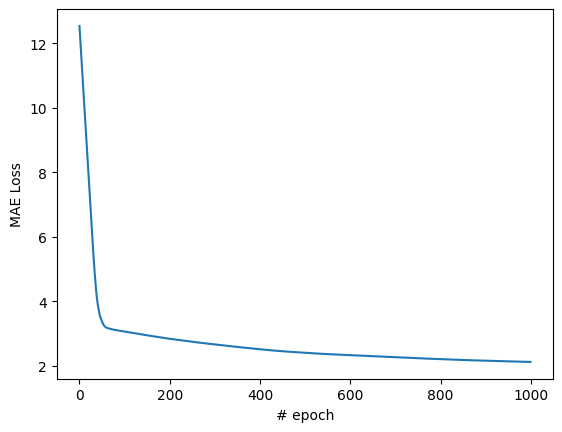

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y,
                                                                   epoch_max=1000,
                                                                   lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MAE Loss")
plt.show()

## Question 4: Add one slack feature

In [ ]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',',
                         skip_header=1).tolist()

    # get tv(index=0)
    tv_data = get_column(data, 0)

    # get radio(index=1)
    radio_data = get_column(data, 1)

    # get newspaper(index=2)
    newspaper_data = get_column(data, 2)

    # get sales(index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3]
         for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [ ]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return[bias, w1, w2, w3]

In [ ]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    # your code here......
    result = sum([w*x for w, x in zip(weights, X_features)])

    return result


def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# compute gradient


def compute_gradient_w(X_features, y, y_hat):
    # your code here......
    dl_dweights = [2*x*(y_hat - y) for x in X_features]
    return dl_dweights

# update weights


def update_weight(weights, dl_dweights, lr):
    # your code here......
    weights = [w - lr*dl_dw for w, dl_dw in zip(weights, dl_dweights)]
    return weights

 epoch 0
 epoch 1
 epoch 2
 epoch 3
 epoch 4
 epoch 5
 epoch 6
 epoch 7
 epoch 8
 epoch 9
 epoch 10
 epoch 11
 epoch 12
 epoch 13
 epoch 14
 epoch 15
 epoch 16
 epoch 17
 epoch 18
 epoch 19
 epoch 20
 epoch 21
 epoch 22
 epoch 23
 epoch 24
 epoch 25
 epoch 26
 epoch 27
 epoch 28
 epoch 29
 epoch 30
 epoch 31
 epoch 32
 epoch 33
 epoch 34
 epoch 35
 epoch 36
 epoch 37
 epoch 38
 epoch 39
 epoch 40
 epoch 41
 epoch 42
 epoch 43
 epoch 44
 epoch 45
 epoch 46
 epoch 47
 epoch 48
 epoch 49


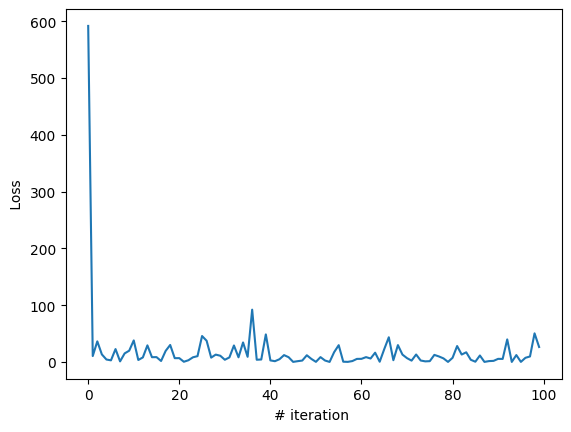

In [ ]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        print(" epoch", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses


X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [ ]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

 epoch 0
 epoch 1
 epoch 2
 epoch 3
 epoch 4
 epoch 5
 epoch 6
 epoch 7
 epoch 8
 epoch 9
 epoch 10
 epoch 11
 epoch 12
 epoch 13
 epoch 14
 epoch 15
 epoch 16
 epoch 17
 epoch 18
 epoch 19
 epoch 20
 epoch 21
 epoch 22
 epoch 23
 epoch 24
 epoch 25
 epoch 26
 epoch 27
 epoch 28
 epoch 29
 epoch 30
 epoch 31
 epoch 32
 epoch 33
 epoch 34
 epoch 35
 epoch 36
 epoch 37
 epoch 38
 epoch 39
 epoch 40
 epoch 41
 epoch 42
 epoch 43
 epoch 44
 epoch 45
 epoch 46
 epoch 47
 epoch 48
 epoch 49
31.339223408109948
